In [1]:
import sys
sys.path.append("../sketchformer")

from basic_usage.sketchformer import continuous_embeddings
sketchformer = continuous_embeddings.get_pretrained_model()

[run-experiment] resorting checkpoint if exists
[Checkpoint] Restored, step #207536


In [4]:
%matplotlib inline
from matplotlib import pyplot as plt

def visualize(sketch):
    X = []
    Y = []

    tmp_x, tmp_y = [], []
    sx = sy = 0
    for p in sketch:
        sx += p[0]
        sy += p[1]
        if p[2] == 1:
            X.append(tmp_x)
            Y.append(tmp_y)
            tmp_x, tmp_y = [], []
        else:
            tmp_x.append(sx)
            tmp_y.append(-sy)

    X.append(tmp_x)
    Y.append(tmp_y)

    for x, y in zip(X, Y):
        plt.plot(x, y)

    # save the image.
    # plt.savefig("sample.png")

    # show the plot
    plt.show()

[array([[ -3, -19,   0],
       [-11, -22,   0],
       [-25, -11,   0],
       [-25,  -1,   0],
       [ -6,   1,   0],
       [-10,   8,   0],
       [-22,  30,   0],
       [-13,  30,   0],
       [ -1,  40,   0],
       [ 15,  14,   0],
       [ 49,  11,   0],
       [ 18,  10,   0],
       [ 16,  -4,   0],
       [ 23, -11,   0],
       [ 23, -23,   0],
       [  8, -15,   0],
       [  4, -55,   0],
       [  0, -18,   0],
       [ -5,  -3,   0],
       [-33,  27,   0],
       [  2, -63,   0],
       [  4, -23,   0],
       [  3,  -5,   0],
       [  0,   5,   0],
       [ -4,  10,   0],
       [ -1,  17,   0],
       [ 17, -13,   0],
       [ 17,  -4,   0],
       [ -2,   5,   0],
       [-25,  19,   0],
       [ -7,  10,   1]], dtype=int16)]


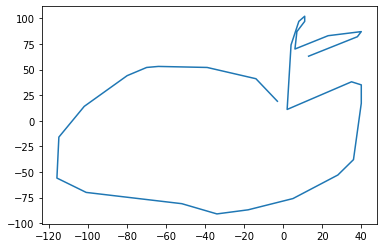

In [5]:
import numpy as np
import random

# load npz
filename = "../sketchformer/basic_usage/quickdraw_samples/sketchrnn_apple.npz"
apples = np.load(filename, encoding='latin1', allow_pickle=True)

# pick sample
N_apple = 1
apple_sketch = []
for _ in range(N_apple):
    ind = random.randint(0, len(apples['test']) - 1)
    apple_sketch.append(apples['test'][ind])

# visualize
visualize(apple_sketch[0])